# 1️⃣ Overfitting Vs Underfitting

## 🔑 Overfitting in Machine Learning
### Definition:
When a model learns **too much from training data**, including noise or irrelevant details.

### Characteristics:
- Performs **very well** on training data.  
- Performs **poorly** on testing/validation data.  

### Example:
- Fitting a very complicated curve to training points → perfect fit for training, but fails on new points.

### Reasons for Overfitting:
- High variance, low bias.  
- Model is **too complex**.  
- **Too little training data**.  
- Training for **too many epochs**.  
- Lack of regularization.


## 🔑 Underfitting in Machine Learning
### Definition:
When a model is **too simple** to capture patterns in the data.

### Characteristics:
- Performs **poorly** on both training and testing data.  

### Example:
- Fitting a straight line to data that follows a curve.

### Reasons for Underfitting:
- Model is **too simple**.  
- **Insufficient features** to explain the target variable.  
- **Small training dataset**.  
- **Excessive regularization** restricting the model.  
- Features are **not scaled** properly.  

👉 Underfitting → **High bias, low variance.**


## 🎯 Visual Understanding
(Usually shown as three plots: underfitting, good fit, overfitting)

- **Underfitting**: Model is too simple → misses true patterns.  
- **Good Fit**: Model captures true patterns → generalizes well.  
- **Overfitting**: Model is too complex → memorizes training data.  


## ✅ Key Takeaways
- **Overfitting** → High variance, low bias.  
- **Underfitting** → High bias, low variance.  
- **Good Model** → Balanced bias-variance tradeoff.  
- Use strategies like:
  - Collecting more data  
  - Using regularization (L1, L2, Dropout)  
  - Cross-validation  
  - Early stopping  
  - Feature scaling & selection 

## 📥 Step 1: Import Libraries
- **NumPy** → For numerical computations and generating data.  
- **Matplotlib** → For plotting graphs.  
- **LinearRegression** → Base regression model from scikit-learn.  
- **PolynomialFeatures** → Converts input data into polynomial terms 
- **make_pipeline** → Combines preprocessing and model into a pipeline.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## 📥 Step 2: Generate Synthetic Dataset
- A dataset of **40 random points** is generated between `0` and `5`.  
- Target values follow a **sine wave** with added **noise**, simulating real-world data with both signal and randomness.

In [2]:
np.random.seed(42)
X = np.sort(np.random.rand(40, 1) * 5, axis=0)   # 40 points between 0 and 5
y = np.sin(X).ravel() + np.random.randn(40) * 0.2 # sine curve + noise

## 📥 Step 3: Define Models with Different Degrees
Polynomial regression is tested with three levels of complexity:
- **Degree 1** → Linear regression (straight line) → likely **underfitting**.  
- **Degree 4** → Polynomial regression with reasonable complexity → **good fit**.  
- **Degree 15** → Very high polynomial degree → risk of **overfitting**.

In [3]:
degrees = [1, 4, 15]  # Underfitting, Good Fit, Overfitting

## 📥 Step 4: Train Models and Plot Results
- A **pipeline** applies polynomial transformation and then fits a linear regression model.  
- Each model is trained on the dataset according to its degree.  
- Smooth values between `0` and `5` are generated to plot prediction curves.  
- Red scatter points represent the training data.  
- Blue curves represent the model predictions.  
- Titles indicate whether the model is showing **underfitting, good fit, or overfitting**.

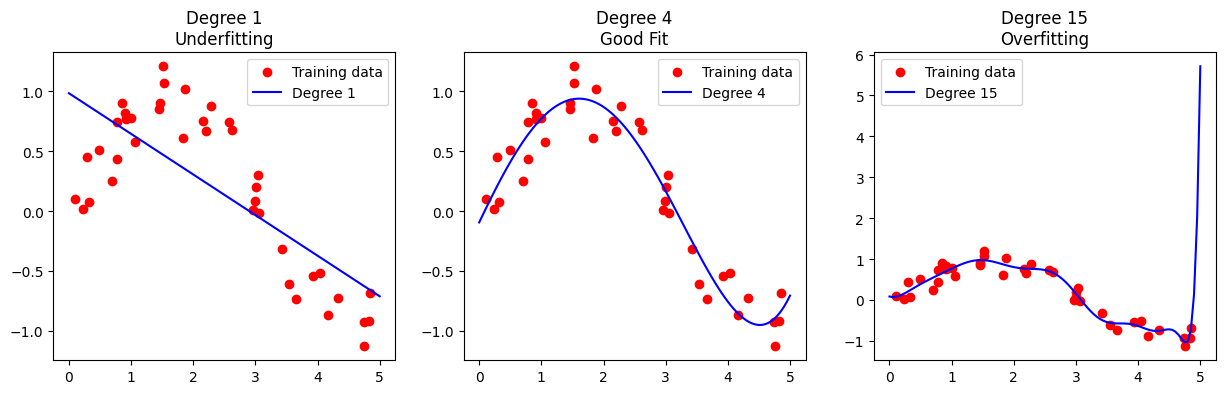

In [4]:
plt.figure(figsize=(15, 4))

for i, deg in enumerate(degrees, 1):
    # Create polynomial regression model
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X, y)
    
    # Predict on a smooth line
    X_test = np.linspace(0, 5, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)
    
    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color="red", label="Training data")
    plt.plot(X_test, y_pred, color="blue", label=f"Degree {deg}")
    plt.title(f"Degree {deg}\n" +
              ("Underfitting" if deg==1 else "Good Fit" if deg==4 else "Overfitting"))
    plt.legend()

plt.show()

## 📊 Final Visualization
- **Degree 1 (Underfitting)** → Model is too simple and misses the sine curve pattern.  
- **Degree 4 (Good Fit)** → Model captures the main trend while ignoring noise.  
- **Degree 15 (Overfitting)** → Model fits every point including noise, producing a wiggly curve that fails to generalize well.  

# 1.1 Traninig loss Vs Validation loss curves

## 🏋️ Training Loss
- Represents the **error of the model on training data**.  
- Computed during every forward/backward pass.  
- Expected to **decrease steadily** as the model learns.  


## 🔍 Validation Loss
- Measures error on a **separate validation dataset** not seen during training.  
- Indicates **generalization ability**.  
- Computed at the **end of each epoch**, without updating model weights.  


## 📊 Why Track Both?
- Training loss alone does not show generalization.  
- Validation loss reveals if the model is **overfitting** or **underfitting**.  
- Monitoring both helps detect:  
  - 🚫 Underfitting  
  - ✅ Good Fit  
  - ⚠️ Overfitting  


## 📈 Common Patterns in Loss Curves

### 1️⃣ Ideal Fit ✅
- Training and validation loss **decrease smoothly** and then plateau.  
- Validation loss stays **close to training loss** (small gap).  

### 2️⃣ Overfitting ⚠️
- Training loss keeps **decreasing**.  
- Validation loss **starts increasing** after a point.  
- Indicates the model is **memorizing training data (noise)**.  

### 3️⃣ Underfitting 🚫
- Both training and validation loss remain **high**.  
- Loss decreases very **slowly or not at all**.  
- Model is **too simple or undertrained**.  


## 🛠 How to Fix

### Overfitting ⚠️
-  Apply **regularization** (L1, L2, dropout).  
-  Use **early stopping** when validation loss stops improving.  
-  Apply **data augmentation** for more variety.  

### Underfitting 🚫
-  Increase **model complexity** (more layers/neurons).  
-  Train for **more epochs**.  
-  Reduce **excessive regularization**.  


## 📋 Visual Summary

| Fit Type     | Training Loss 📉               | Validation Loss 📉               | Interpretation 🧠                             |
|--------------|--------------------------------|----------------------------------|-----------------------------------------------|
| Ideal Fit  | Decreases, then stabilizes     | Close to training loss           | Balanced generalization                       |
| Overfitting  | Decreases continuously        | Decreases then increases         | Memorizing noise, poor generalization         |
| Underfitting  | High, flat or very slow drop | High, flat or very slow drop     | Model too simple / insufficient training      |


## 🎯 Key Takeaway
- **Training Loss** → Shows how well the model fits the training data.  
- **Validation Loss** → Shows how well the model generalizes.  
- The **best model** has **both losses low** with a **small gap**.  
- Diverging curves indicate overfitting or underfitting.  

✨ Well-behaved curves = strong model.  

# 🧠 Training vs Validation Loss in MNIST Classification

## 📥 Dataset
- MNIST dataset contains **handwritten digits (0–9)**.  
- Data is split into **training set** and **test set**.  
- Pixel values are normalized from **0–255 → 0–1** to improve training efficiency.  

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## 🏗️ Neural Network Model
- **Flatten layer**: Converts each 28×28 image into a 784-dimensional vector.  
- **Dense layer (128 neurons, ReLU)**: Learns patterns and features from the input.  
- **Dropout (20%)**: Prevents overfitting by randomly ignoring neurons during training.  
- **Dense output layer (10 neurons, Softmax)**: Produces probability distribution over 10 digit classes.  

In [6]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

## ⚙️ Compilation
- **Optimizer**: Adam (adaptive gradient descent algorithm).  
- **Loss function**: Sparse categorical cross-entropy (suitable for multi-class classification).  
- **Metric**: Accuracy (percentage of correctly classified digits).
  
## 🚀 Training Process
- Model is trained for **10 epochs**.  
- **Training data** is used to update model weights.  
- **Validation data (test set)** is used to evaluate generalization ability.  
- A `history` object stores training and validation losses for each epoch.  


## 📉 Training vs Validation Loss
- **Training Loss** → Error the model makes on the training dataset.  
- **Validation Loss** → Error the model makes on unseen validation data.  
- Plotting both curves across epochs reveals how well the model is generalizing.  

C:\Users\Sambridhi Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9114 - loss: 0.3001 - val_accuracy: 0.9547 - val_loss: 0.1470
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9566 - loss: 0.1449 - val_accuracy: 0.9697 - val_loss: 0.1039
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9674 - loss: 0.1083 - val_accuracy: 0.9748 - val_loss: 0.0815
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9724 - loss: 0.0877 - val_accuracy: 0.9771 - val_loss: 0.0764
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9768 - loss: 0.0746 - val_accuracy: 0.9767 - val_loss: 0.0760
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9793 - loss: 0.0654 - val_accuracy: 0.9772 - val_loss: 0.0760
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9815 - loss: 0.0585 - val_accuracy: 0.9779 - val_loss: 0.0691
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9828 - loss: 0

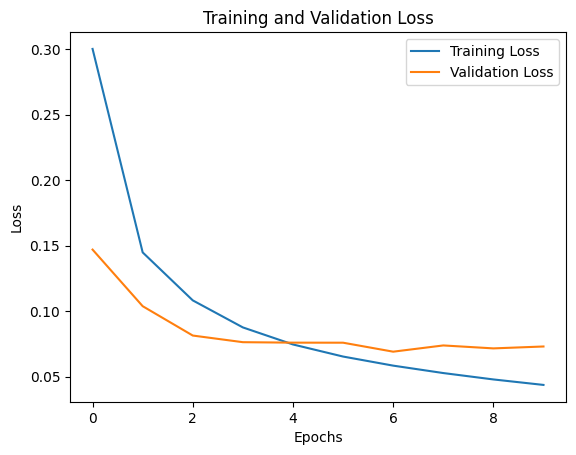

In [7]:
# Building a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Flatten the 2D image into 1D
    layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model with loss function and optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with training and validation data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plotting Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 🎯 Interpretation of Curves
- ✅ **Good Fit**: Both training and validation losses decrease smoothly and remain close.  
- ⚠️ **Overfitting**: Training loss keeps decreasing, but validation loss starts increasing.  
- 🚫 **Underfitting**: Both training and validation losses remain high, showing the model is too simple.  

# 2️⃣Bias-variance tradeoff

The **bias–variance tradeoff** explains why models underfit or overfit and helps in choosing the right balance for good generalization.  

## 🎯 Bias
- Error from **overly simplistic assumptions** in the model.  
- High bias ⟶ model cannot capture underlying patterns.  
- Leads to **underfitting**.  
- Example: Using a straight line to model a curved relationship.  


## 🔄 Variance
- Error from the model being **too sensitive** to training data.  
- High variance ⟶ model learns noise as well as patterns.  
- Leads to **overfitting**.  
- Example: A decision tree that perfectly memorizes training data but fails on test data.  


## 📊 The Tradeoff
- **Simple models** ⟶ High Bias, Low Variance (❌ underfitting).  
- **Complex models** ⟶ Low Bias, High Variance (❌ overfitting).  
- **Goal** ⟶ Find the “sweet spot” where **total error is minimized**.  

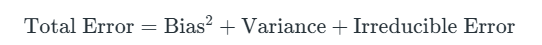

## 🧩 Combinations

| Bias 🔺 | Variance 🔺 | Outcome ⚡ |
|---------|-------------|------------|
| High    | Low         | Underfitting  |
| Low     | High        | Overfitting  |
| High    | High        | Worst case  |
| Low     | Low         | Ideal case  (rare in practice) |


## 🛠️ How to Balance
- If **underfitting (high bias)** → use more complex models, add features, train longer.  
- If **overfitting (high variance)** → simplify model, add regularization (L1/L2/dropout), collect more data, or use ensemble methods.  


## ✨ Key Takeaway
The **bias–variance tradeoff** is about balancing simplicity and complexity:  
- Too simple ⟶ misses patterns (underfitting).  
- Too complex ⟶ memorizes noise (overfitting).  
- ✅ The best models find the balance and generalize well to unseen data.  

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 📊 Bias–Variance Tradeoff Demonstration

This example demonstrates how **polynomial regression** of different degrees affects **bias and variance**, and visualizes the impact on **training and test errors**.

## 🎯 Dataset
- A synthetic dataset is generated with **100 data points** between 0 and 5.  
- The target values are based on a **sine function** with added **random noise**.  
- This setup simulates real-world data with an underlying pattern plus randomness.  

In [9]:
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 5, axis=0)   # Features between 0 and 5
y = np.sin(X).ravel() + np.random.randn(100) * 0.2  # Sine curve + noise

## 🔀 Train-Test Split
- Data is divided into **training (70%)** and **testing (30%)** sets.  
- Training data is used to **fit the model**, while test data evaluates **generalization performance**.  

In [10]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 🏗️ Polynomial Regression Models
- Three polynomial degrees are considered: **1, 4, and 15**.  
- Degree controls **model complexity**:  
  - Degree 1 → Simple model → high bias, underfitting.  
  - Degree 4 → Balanced complexity → good fit.  
  - Degree 15 → Very complex model → high variance, overfitting.  
- **Pipeline** is used to combine polynomial feature expansion and linear regression.

In [11]:
# Polynomial degrees to test (controls complexity)
degrees = [1, 4, 15]

## 📈 Training and Test Predictions
- After fitting, predictions are made on both the **training set** and a **smooth curve** of input values for plotting.  
- **Mean Squared Error (MSE)** is computed for both training and test sets to quantify performance:  
  - **Low MSE on training but high on test** → overfitting.  
  - **High MSE on both** → underfitting.  

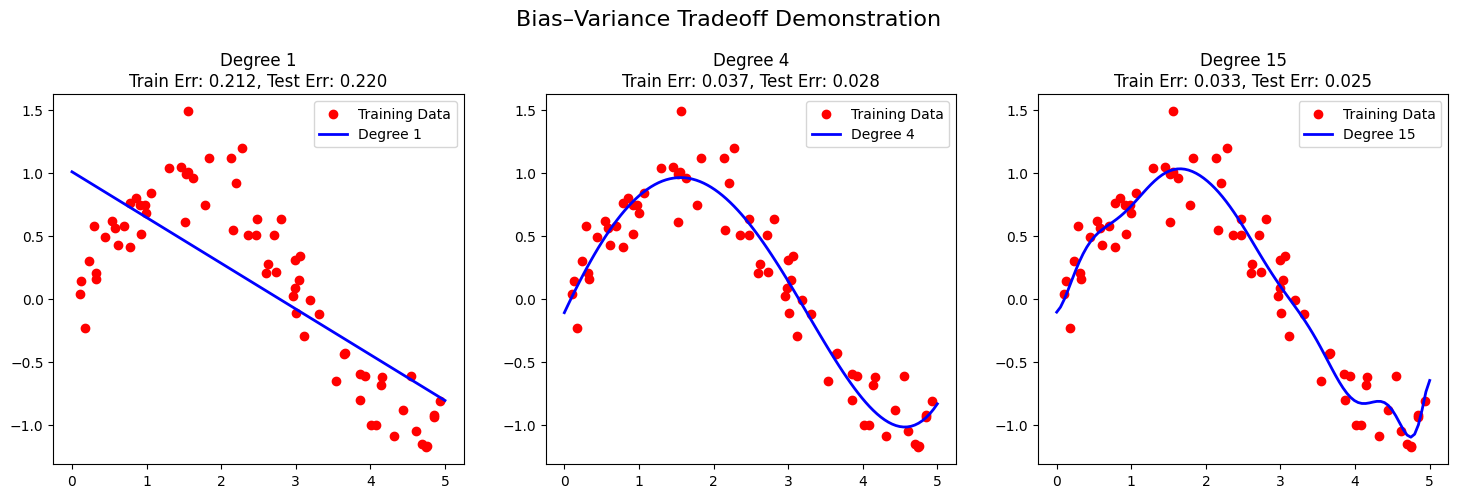

In [12]:
plt.figure(figsize=(18, 5))

for i, deg in enumerate(degrees, 1):
    # Create polynomial regression model
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Plot predictions
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color="red", label="Training Data")
    plt.plot(X_plot, y_plot, color="blue", linewidth=2, label=f"Degree {deg}")
    plt.title(f"Degree {deg}\nTrain Err: {train_error:.3f}, Test Err: {test_error:.3f}")
    plt.legend()

plt.suptitle("Bias–Variance Tradeoff Demonstration", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.85)

## 🎨 Visualization
- Three subplots show model behavior for each polynomial degree:  
  - **Red points** → training data.  
  - **Blue curve** → predicted function from the model.  
- Each subplot title includes **training and test error** to directly compare performance.  
- The overall figure has a **suptitle** describing the demonstration.  

## 🔎 Interpretation
- **Degree 1 (linear)**: High bias → underfits → both training and test errors are high.  
- **Degree 4**: Balanced fit → low bias and variance → good generalization.  
- **Degree 15**: Low bias but high variance → overfits → training error very low, test error high.  


## ✨ Key Takeaways
- Increasing model complexity reduces **bias** but increases **variance**.  
- The **bias–variance tradeoff** is visually observable:  
  - Simple models → underfit.  
  - Complex models → overfit.  
- Proper model selection seeks the **sweet spot** where both training and test errors are reasonably low.  
- Plotting predictions and errors together is an effective way to **understand and communicate bias and variance effects**.

# 3️⃣ Regularization techniques

Regularization techniques help prevent **overfitting** and improve **generalization** by constraining the model or adding extra information during training.  

## 🔧 Main Regularization Techniques

### 1️⃣ L1 vs L2 Regularization (Weight Decay) 🏋️
- **L1 Regularization (Lasso)**: Adds a penalty proportional to the **absolute value of weights**.  
  - Encourages **sparse models** (some weights become zero).  
  - Helps in **feature selection**.
    
  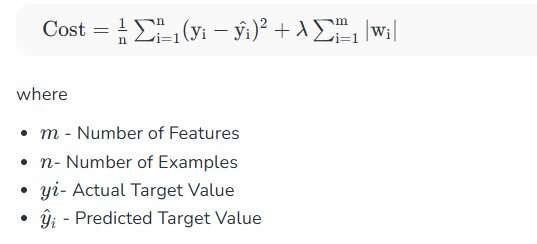
- **L2 Regularization (Ridge)**: Adds a penalty proportional to the **square of weights**.  
  - Shrinks weights but rarely sets them to zero.  
  - Reduces **overfitting** without removing features.
  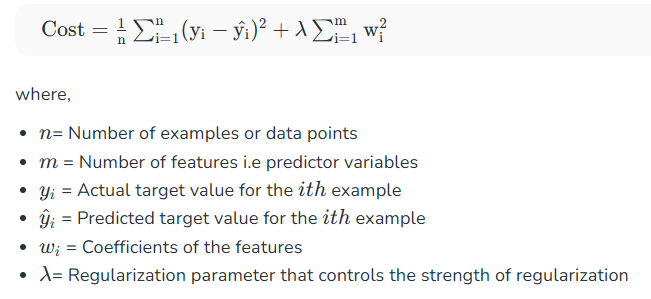
- **Key Idea**: Both penalize large weights to prevent the model from fitting noise in the data.  


### 2️⃣ Dropout 
- Randomly "drops" a fraction of neurons during training.  
- Forces the network to not rely on specific neurons, promoting **redundancy and robustness**.  
- Commonly used in **deep learning** to reduce overfitting.  


### 3️⃣ Data Augmentation 
- Expands the dataset by creating **modified copies of input data**.  
- Examples for images: **flips, rotations, scaling, translations**.  
- Helps the model **generalize better** by learning from more diverse inputs.  


### 4️⃣ Early Stopping 
- Monitors **validation performance** during training.  
- Stops training when **performance stops improving**.  
- Prevents the model from overfitting after it has already learned the main patterns.  


## ✨ Summary
- Regularization techniques reduce **overfitting** and improve **generalization**.  
- Choose the technique depending on the model and data:  
  - **L1/L2** → linear models, neural networks  
  - **Dropout** → deep neural networks  
  - **Data augmentation** → images, text, or structured data  
  - **Early stopping** → iterative training processes  

In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L2 Regularization (Ridge)
ridge = Ridge(alpha=1.0)  # L2 penalty
ridge.fit(X_train, y_train)
print("Ridge coefficients (L2):", ridge.coef_)

# L1 Regularization (Lasso)
lasso = Lasso(alpha=0.1)  # L1 penalty
lasso.fit(X_train, y_train)
print("Lasso coefficients (L1):", lasso.coef_)

Ridge coefficients (L2): [60.63637278 96.98551195 59.08143576 54.68225819 35.36748071]
Lasso coefficients (L1): [61.33099357 98.53280631 60.38423871 55.28628842 35.68097943]


## 💡 L1 vs L2 Regularization

- **L2 Regularization (Ridge)**:
  - Adds a penalty proportional to the square of the weights.
  - Helps prevent overfitting by discouraging large weights.
  - Smooths the model while retaining all features.
  
- **L1 Regularization (Lasso)**:
  - Adds a penalty proportional to the absolute value of weights.
  - Can shrink some weights to exactly zero → useful for feature selection.
  
- **Usage**:  
  - Helps control model complexity.  
  - Reduces overfitting by limiting coefficient magnitudes.


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X_nn = np.random.rand(1000, 20)
y_nn = np.random.randint(0, 2, 1000)

# Split train/test
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42
)

# Build neural network with Dropout (fixed warning)
model = models.Sequential([
    layers.Input(shape=(20,)),           # Input layer instead of input_shape in Dense
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_nn, y_train_nn,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate model
loss, accuracy = model.evaluate(X_test_nn, y_test_nn)
print(f"Neural Network Test Accuracy: {accuracy:.3f}")

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4750 - loss: 0.7112 - val_accuracy: 0.5063 - val_loss: 0.6990
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4891 - loss: 0.6917 - val_accuracy: 0.5125 - val_loss: 0.6944
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5422 - loss: 0.6898 - val_accuracy: 0.5063 - val_loss: 0.6948
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5234 - loss: 0.6888 - val_accuracy: 0.5375 - val_loss: 0.6975
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5453 - loss: 0.6831 - val_accuracy: 0.5188 - val_loss: 0.6957
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5500 - loss: 0.6841 - val_accuracy: 0.5312 - val_loss: 0.6989
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5281 - loss: 0.6912 - val_accuracy: 0.5312 - val_loss: 0.6960
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5150 - loss: 0.6943  
Neural Network Test Accuracy: 0.

## 💡 Dropout & Early Stopping

- **Dropout**:
  - Randomly disables a fraction of neurons during training.
  - Prevents co-adaptation of neurons → reduces overfitting.
  
- **Early Stopping**:
  - Stops training if validation loss does not improve for `patience` epochs.
  - Restores the best weights → avoids overfitting while training long enough.
  
- **Effect**:
  - Dropout + Early Stopping help neural networks generalize better on unseen data.

In [15]:
! pip install --upgrade tensorflow

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

mnist = tf.keras.datasets.mnist
(x_train_img, y_train_img), (x_test_img, y_test_img) = mnist.load_data()

# Normalize and reshape images
x_train_img = x_train_img.reshape(-1, 28, 28, 1) / 255.0
x_test_img = x_test_img.reshape(-1, 28, 28, 1) / 255.0


#  Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=10,      # rotate ±10 degrees
    width_shift_range=0.05, # horizontal shift ±5%
    height_shift_range=0.05 # vertical shift ±5%
    # horizontal_flip removed for digits
)
datagen.fit(x_train_img)


#  Build CNN with Dropout

cnn_model = models.Sequential([
    layers.Input(shape=(28,28,1)),          # Input layer to remove warnings
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),                  # Dropout 25%
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),                   # Dropout 50%
    layers.Dense(10, activation='softmax') # 10 output classes
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


#  Early Stopping

early_stop_cnn = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)


#  Train CNN with augmented data

cnn_history = cnn_model.fit(
    datagen.flow(x_train_img, y_train_img, batch_size=64),
    epochs=10,   # reduced epochs for faster testing
    validation_data=(x_test_img, y_test_img),
    callbacks=[early_stop_cnn]
)


#  Evaluate CNN
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_img, y_test_img)
print(f"CNN Test Accuracy with Data Augmentation: {cnn_acc:.3f}")

Epoch 1/10


C:\Users\Sambridhi Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8714 - loss: 0.4179 - val_accuracy: 0.9777 - val_loss: 0.0690
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9382 - loss: 0.2001 - val_accuracy: 0.9825 - val_loss: 0.0542
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9503 - loss: 0.1648 - val_accuracy: 0.9858 - val_loss: 0.0433
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9567 - loss: 0.1432 - val_accuracy: 0.9878 - val_loss: 0.0361
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9602 - loss: 0.1322 - val_accuracy: 0.9848 - val_loss: 0.0458
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9637 - loss: 0.1209 - val_accuracy: 0.9885 - val_loss: 0.0328
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9650 - loss: 0.1142 - val_accuracy: 0.9896 - val_loss: 0.0289
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9686 - loss: 0.1045 - val_accurac

## 💡 Data Augmentation

- **Purpose**: Artificially increase the size and diversity of the training dataset.
- **Techniques**:
  - Rotation
  - Width/Height shift
  - Horizontal flip
- **Effect**:
  - Prevents overfitting
  - Improves generalization of CNN models
- **Dropout in CNN**:
  - Further regularizes the model by randomly dropping neurons during training.


# 4️⃣ Batch Normalization in Deep Learning

## 📌 What is Batch Normalization?

Batch Normalization (BN) is a technique used to reduce the problem of **internal covariate shift** in neural networks. It normalizes the inputs of each layer by adjusting and scaling activations. This process stabilizes the learning process and accelerates convergence.


## ⚙️ How Does Batch Normalization Work?

1. **Compute the Mean and Variance of Mini-Batches:**
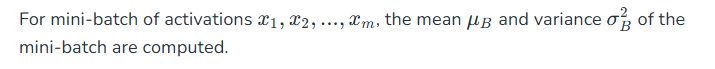
  of the mini-batch are computed.
2. **Normalize:**
   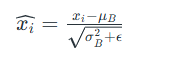

3. **Scale and Shift:**
   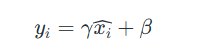

   This allows the model to learn the optimal scaling and shifting of the normalized activations.


## ✅ Why Use Batch Normalization?

- **Reduces Internal Covariate Shift:** By normalizing the inputs to each layer, BN reduces the internal covariate shift, leading to more stable and faster training.

- **Accelerates Convergence:** BN allows the use of higher learning rates and reduces the dependence on careful initialization, leading to faster convergence.

- **Improves Gradient Flow:** BN helps mitigate issues like vanishing or exploding gradients, improving the flow of gradients during backpropagation.

- **Acts as a Regularizer:** BN introduces noise during training, which can have a regularizing effect, reducing the need for other regularization techniques like dropout.


# 🧠 Batch Normalization

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

## 1️ Data Loading and Preprocessing
- The **MNIST dataset** of handwritten digits is loaded.
- Images are reshaped to include a single channel `(28,28,1)` for CNN input.
- Pixel values are **normalized to [0,1]** by dividing by 255, which speeds up convergence.

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

## 2️ Building the CNN with Batch Normalization
- **Convolutional layers** extract features from images.
- **Batch Normalization layers** are added **after convolution or dense layers and before activation**.
  - BN **normalizes activations** for each mini-batch.
  - Reduces **internal covariate shift**.
- **Activation layers (ReLU)** are applied after BN to introduce non-linearity.
- **MaxPooling layers** downsample feature maps to reduce spatial dimensions.
- The network ends with **Dense layers**, with BN applied before ReLU in the hidden layer and **softmax activation** in the output layer for classification.

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), input_shape=(28,28,1)),
    layers.BatchNormalization(),       #  Normalize activations
    layers.Activation('relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3)),
    layers.BatchNormalization(),      
    layers.Activation('relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),      
    layers.Activation('relu'),

    layers.Dense(10, activation='softmax')
])

C:\Users\Sambridhi Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3️ Model Compilation
- The network is compiled using:
  - **Adam optimizer** for adaptive learning.
  - **Sparse categorical cross-entropy** loss for multi-class classification.
  - **Accuracy metric** to monitor performance.

In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## 4️ Model Training
- The model is trained on the **training set** and validated on the **test set**.
- BN helps the model **converge faster** and allows **higher learning rates** without instability.

In [21]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.9729 - loss: 0.0972 - val_accuracy: 0.9855 - val_loss: 0.0481
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9893 - loss: 0.0357 - val_accuracy: 0.9835 - val_loss: 0.0513
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9902 - val_loss: 0.0297
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9939 - loss: 0.0187 - val_accuracy: 0.9876 - val_loss: 0.0397
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9963 - loss: 0.0126 - val_accuracy: 0.9927 - val_loss: 0.0240
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9964 - loss: 0.0113 - val_accuracy: 0.9900 - val_loss: 0.0329
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9969 - loss: 0.0100 - val_accuracy: 0.9912 - val_loss: 0.0286
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9978 - loss: 0.0071 - 

## 5️ Model Evaluation
- After training, the model is evaluated on the test set.
- Batch Normalization contributes to **better generalization** and **higher test accuracy**.

In [22]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9935 - loss: 0.0240
Test Accuracy: 0.993


# 5️⃣ Learning Rate Schedulers

## 5.1 Step Decay 

Step Decay is a **learning rate scheduling technique** used to improve the training of deep learning models. It gradually decreases the learning rate at **fixed intervals** (steps) during training to allow the model to converge more efficiently.


## 🔧 Concept

- During training, a **large learning rate** is often useful at the beginning to make **big updates** and quickly learn coarse patterns in the data.
- As the model trains, **smaller learning rates** are preferred to fine-tune the weights and avoid overshooting the minimum of the loss function.
- Step Decay implements this by reducing the learning rate **by a fixed factor** after a certain number of epochs, called the **step size**.


## 🧮 Formula

The learning rate at epoch \(t\) is calculated as:
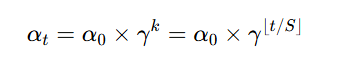

Where:

- αt = Learning rate at epoch t  
- α0 = Initial learning rate  
- gamma = Decay factor (a value between 0 and 1, e.g., 0.5)  
- s = Step size (number of epochs between each decay)  
- t = Current epoch  

**Explanation:**  
- Every s epochs, the learning rate is multiplied by gamma, effectively **halving, reducing by 25%, or another fraction**, depending on the decay factor chosen.  
- The “staircase” shape of this schedule is why it’s called **step decay**.


## 📈 How It Works

1. Start training with the **initial learning rate** (\(\eta_0\)).
2. After every **step_size epochs**, the learning rate is **reduced** by multiplying with the decay factor (\(\gamma\)).
3. This allows:
   - **Faster learning in early epochs** with higher learning rates.
   - **Stable convergence in later epochs** with smaller learning rates.


## ✅ Advantages

- **Simple and easy to implement:** Step decay is intuitive and doesn’t require complex computations.
- **Faster convergence:** Large initial learning rate speeds up early training.
- **Stable fine-tuning:** Smaller learning rates later help the model settle near the loss minimum.
- **Predictable behavior:** Provides consistent updates, which is useful when training large networks.


## ⚠️ Limitations

- **Non-adaptive:** Learning rate changes are fixed and do not respond to model performance.
- **Manual tuning needed:** Requires careful selection of initial learning rate, decay factor, and step size.
- **Discrete jumps:** The sudden reduction in learning rate can sometimes cause temporary instability in training.


## 📊 Visual Representation

Imagine training loss vs. epochs:

- Learning rate starts **high** → big jumps in parameter updates.
- Every `step_size` epochs, learning rate drops → smaller updates → smoother convergence.
- The curve has a **staircase shape** for learning rate decay.

## 🔄 Comparison with Other Schedulers

| Scheduler Type       | Update Frequency      | Learning Rate Behavior          |
|----------------------|--------------------|-------------------------------|
| Step Decay           | Fixed intervals     | Sudden drops (staircase)       |
| Exponential Decay    | Every epoch         | Smooth continuous decay        |
| Cosine Annealing     | Cyclic              | Oscillating decay              |
| Adaptive (ReduceLR)  | Performance-based   | Reduces if validation plateaus |

**Key Point:** Step Decay is simple but less adaptive compared to performance-based schedulers.


## 🧾 Summary

- Step Decay reduces the learning rate by a **fixed factor** at **fixed intervals**.
- Helps **accelerate early learning** and **stabilize late training**.
- It’s widely used in image classification, NLP, and other deep learning tasks.
- Choosing proper **initial learning rate, decay factor, and step size** is crucial for good results.
- Offers a **predictable and easy-to-understand** learning rate schedule, making it a popular choice for many training pipelines.

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

## A. Load and Preprocess Data
- MNIST dataset is loaded and normalized to [0,1].  
- Normalization helps in **faster convergence**.

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## B. Step Decay Scheduler
- A **custom function `step_decay(epoch)`** defines how the learning rate changes over epochs:
  - `initial_lr = 0.1` → starting learning rate.
  - `drop = 0.5` → decay factor applied every `epochs_drop` epochs.
  - `epochs_drop = 10` → step size in epochs after which the learning rate is reduced.

In [25]:
def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(step_decay)

## C. Model Architecture
- Simple **fully connected neural network**:
  - Flatten input layer for MNIST images.
  - Dense hidden layer with 128 neurons and ReLU activation.
  - Dense output layer with 10 neurons (softmax for classification).
- Step Decay affects the optimizer's learning rate during training.

In [26]:
# Build a simple model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Sambridhi Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## D. Model Compilation
- **Optimizer:** SGD (stochastic gradient descent).  
- **Loss:** Sparse categorical crossentropy.  
- **Metrics:** Accuracy.  

In [27]:
# Compile the model
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## E. Model Training
- Training for 30 epochs with batch size 64.
- `callbacks=[lr_callback]` ensures learning rate is updated at each epoch according to step decay.

In [28]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=30,
                    batch_size=64,
                    callbacks=[lr_callback])


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8963 - loss: 0.3739 - val_accuracy: 0.9368 - val_loss: 0.2252 - learning_rate: 0.1000
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9442 - loss: 0.1970 - val_accuracy: 0.9501 - val_loss: 0.1696 - learning_rate: 0.1000
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9576 - loss: 0.1490 - val_accuracy: 0.9610 - val_loss: 0.1348 - learning_rate: 0.1000
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9653 - loss: 0.1204 - val_accuracy: 0.9665 - val_loss: 0.1168 - learning_rate: 0.1000
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9713 - loss: 0.1016 - val_accuracy: 0.9654 - val_loss: 0.1156 - learning_rate: 0.1000
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9756 - loss: 0.0873 - val_accuracy: 0.9713 - val_loss: 0.0996 - learning_rate: 0.1000
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9780 - loss: 0.0767 - 

# 5.2 ReduceLROnPlateau 

The **ReduceLROnPlateau** scheduler is an adaptive learning rate adjustment technique that reduces the learning rate when a specified metric has stopped improving. This approach is particularly useful when the model's performance plateaus, allowing for finer adjustments to the learning rate to escape local minima and achieve better convergence.

## 🔧 How It Works

- **Monitoring Metric**: The scheduler monitors a specified metric, typically the validation loss.
- **Patience**: If the metric does not improve for a set number of epochs (patience), the learning rate is reduced.
- **Factor**: The learning rate is multiplied by a factor (less than 1) to reduce it.
- **Threshold**: Only improvements larger than a certain threshold are considered significant.
- **Cooldown**: After reducing the learning rate, the scheduler waits for a specified number of epochs before resuming normal operation.


## ✅ Advantages

- **Adaptive Adjustment**: Dynamically adjusts the learning rate based on training progress.
- **Prevents Overfitting**: Helps in fine-tuning the model by reducing the learning rate when the model starts to overfit.
- **Improves Convergence**: Allows the model to converge more effectively by escaping local minima.


## ⚠️ Limitations

- **Requires Monitoring**: Needs careful monitoring of the specified metric.
- **May Lead to Premature Reduction**: If patience is set too low, the learning rate may be reduced prematurely.
- **Not Suitable for All Models**: May not be effective for all types of models or datasets.

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import Callback

## 1️ Data Preparation
- MNIST dataset is loaded and normalized.
- Normalization helps the model train faster and converge more reliably.

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## 2️ Model Architecture
- A **simple fully connected neural network**:
  - Flatten input layer to convert images into 1D vectors.
  - Dense hidden layer with 128 neurons (ReLU activation).
  - Output layer with 10 neurons (softmax activation) for classification

In [31]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## 3️ ReduceLROnPlateau Callback
- Monitors `val_loss` to detect when performance plateaus.
- Parameters:
  - `factor=0.5` → reduces learning rate by 50%.
  - `patience=3` → waits 3 epochs without improvement before reducing.
  - `min_lr=1e-5` → lower bound on learning rate.
- Adaptive adjustment helps the model **fine-tune weights** and **avoid overshooting minima**.

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4️ Training
- Model is trained for 20 epochs with a batch size of 64.
- ReduceLROnPlateau automatically reduces the learning rate if validation loss stops improving.

## 5️ Visualization
- **Training & Validation Loss Plot**:
  - Shows how the model converges over epochs.
  - Plateau regions in validation loss may trigger learning rate reduction.
- **Learning Rate Plot**:
  - Shows step-wise reductions in learning rate according to the scheduler.

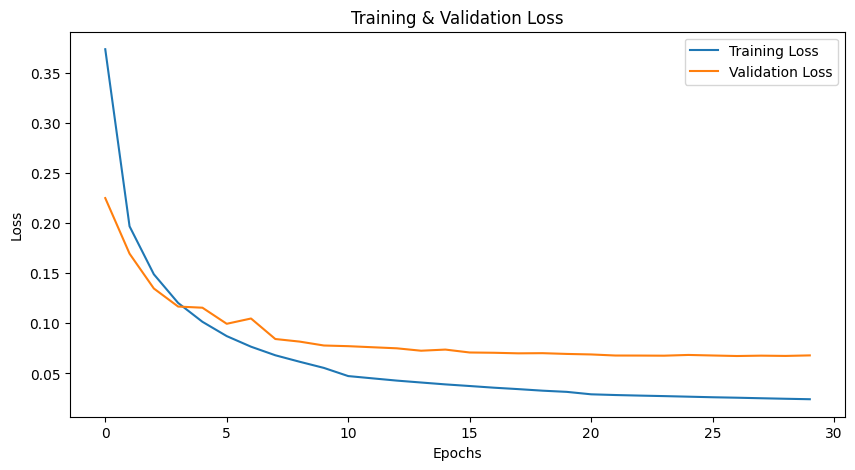

In [37]:
# Plot Training & Validation Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## ✅ Benefits
- Dynamically adapts the learning rate based on model performance.
- Improves convergence when the training process stalls.
- Acts as a regularization technique to help reduce overfitting.

# 5.3 Cosine Annealing

# 🌙 Cosine Annealing Learning Rate Scheduler

The **Cosine Annealing Learning Rate Scheduler** adjusts the learning rate following a **cosine function**, gradually decreasing it over time. This helps the model converge smoothly and potentially escape local minima.


## 🔧 How It Works

The learning rate at epoch \(t+1\) is computed as:
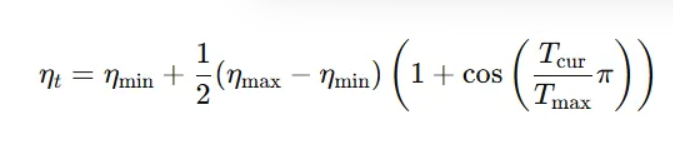

Where:

- eta_t : Learning rate at step \(t+1\)
- eta_min : Minimum learning rate  
- eta_max : Maximum learning rate  
- T_cur : Number of epochs since last restart  
- T_max : Maximum number of epochs in a cycle  

This ensures the learning rate starts high eta_max and gradually decreases to eta_min over T_max epochs.


## 🔁 CosineAnnealingWarmRestarts

This is an extension with **periodic restarts**:

- The learning rate resets to eta_max after a certain number of epochs.
- Helps the model escape local minima and explore the loss landscape more effectively.
- After each restart, the cycle length can increase, allowing slower decay.


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt

## A. Model Definition
- A simple fully connected neural network is used:
  - Input layer flattens the 28x28 image into a vector.
  - Hidden layer has 128 neurons with ReLU activation.
  - Output layer has 10 neurons for classification.
- This model demonstrates how the learning rate scheduler behaves.

In [39]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

## B. Optimizer
- Stochastic Gradient Descent (SGD) optimizer with initial learning rate 0.1.
- The optimizer updates model parameters during training.


In [40]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

## C. CosineAnnealingLR Scheduler
- The scheduler decreases the learning rate using a **cosine function** over `T_max=20` epochs, down to `eta_min=0.001`.
- Gradual decay allows smooth convergence and helps escape local minima.

In [41]:
scheduler = CosineAnnealingLR(optimizer, T_max=20, eta_min=0.001)

## D. Dummy Training Loop
- Loop simulates 50 epochs of training.
- **Important:** Call `optimizer.step()` first, then `scheduler.step()` to avoid PyTorch warnings.
- Learning rate at each epoch is recorded for plotting.
- Normally, actual training (`loss.backward()`) would occur here.

In [42]:
epochs = 50
lrs = []

for epoch in range(epochs):
    optimizer.step()  # simulate parameter update
    lrs.append(optimizer.param_groups[0]['lr'])  # Record current learning rate
    scheduler.step()  # then update LR

## E. Visualization
- Learning rate is plotted vs. epochs.
- The curve shows a smooth **cosine decay** from the initial value to the minimum value.
- This helps visualize how the scheduler reduces the learning rate during training.

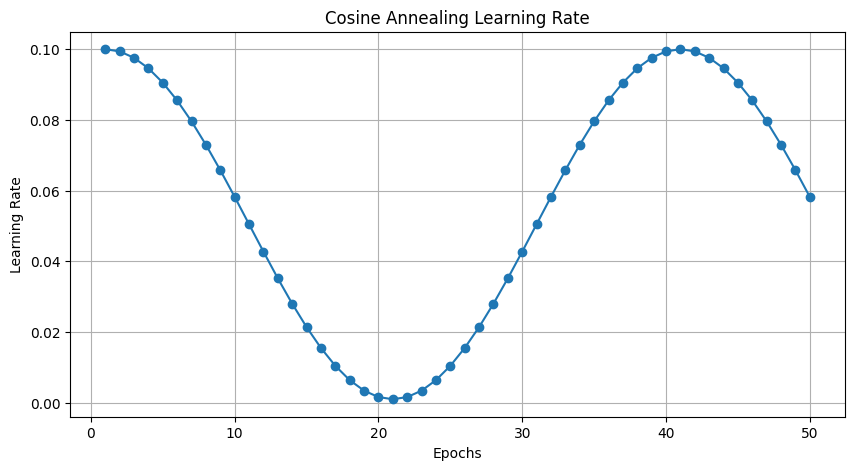

In [43]:
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), lrs, marker='o')
plt.title('Cosine Annealing Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

# 6️⃣📊 Evaluation Metrics in Machine Learning

In machine learning, evaluating a model's performance is crucial to understand how well it predicts outcomes. **Evaluation metrics** provide quantitative measures to assess this performance. Commonly used metrics include:

## A. Confusion Matrix

A **confusion matrix** is a table that summarizes the performance of a classification model by comparing predicted vs actual labels.  

|               | Predicted Positive | Predicted Negative |
|---------------|-----------------|-----------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN) |

- **TP (True Positive):** Model correctly predicts positive class.  
- **TN (True Negative):** Model correctly predicts negative class.  
- **FP (False Positive):** Model incorrectly predicts positive class.  
- **FN (False Negative):** Model incorrectly predicts negative class.  

**Use Case:**  
- Provides a detailed view of classification results.  
- Useful for imbalanced datasets where simple accuracy may be misleading.  


## B. Accuracy

**Accuracy** measures the proportion of correctly predicted instances among all instances:

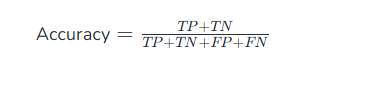

- **Range:** 0 to 1 (or 0% to 100%)  
- **Use Case:**  
  - Simple and intuitive metric.  
  - Works well for **balanced datasets**.  
- **Limitation:**  
  - Misleading for **imbalanced datasets** (e.g., rare diseases).  


## C. Precision

**Precision** measures how many of the predicted positive instances are actually positive:

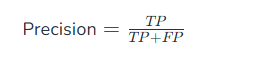
- **Range:** 0 to 1  
- **Use Case:**  
  - Important when **false positives** are costly (e.g., spam detection).  
- **Interpretation:**  
  - High precision → model makes very few false positive errors.  



## D. Recall (Sensitivity)

**Recall** measures how many of the actual positive instances were correctly predicted:

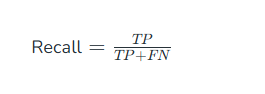

- **Range:** 0 to 1  
- **Use Case:**  
  - Important when **false negatives** are costly (e.g., disease detection).  
- **Interpretation:**  
  - High recall → model detects most of the positive cases.  

---

## E. F1 Score

**F1 Score** is the harmonic mean of precision and recall:

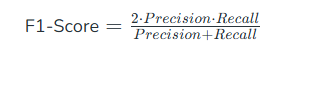

- **Range:** 0 to 1  
- **Use Case:**  
  - Useful for **imbalanced datasets**.  
  - Balances **precision and recall**.  
- **Interpretation:**  
  - High F1 score → good balance between false positives and false negatives.  


## 🔑 Summary

| Metric     | Formula                           | Focus                          | Use Case                                       |
|------------|----------------------------------|--------------------------------|-----------------------------------------------|
| Accuracy   | (TP + TN) / Total                 | Overall correctness             | Balanced datasets                              |
| Precision  | TP / (TP + FP)                     | False positives                 | Spam detection, fraud detection               |
| Recall     | TP / (TP + FN)                     | False negatives                 | Disease detection, rare events                |
| F1 Score   | 2 * (Precision * Recall) / (P + R) | Balance of precision & recall  | Imbalanced datasets                            |
| Confusion Matrix | Table of TP, TN, FP, FN          | Detailed error analysis         | All classification tasks, especially imbalance |


## 🛠 Why These Metrics Are Used

1. **Accuracy:** Quick overall performance measure.  
2. **Precision:** Avoids false alarms; useful when predicting positives is critical.  
3. **Recall:** Ensures positive cases are not missed; useful for rare events.  
4. **F1 Score:** Balances precision and recall; best for imbalanced datasets.  
5. **Confusion Matrix:** Visual representation of all prediction outcomes; helps diagnose model behavior.  


##  Accuracy
- **Purpose:** Measures the proportion of correctly predicted instances among all instances.
- **Code Explanation:**
  - `accuracy_score` from `sklearn.metrics` is used.
  - Inputs: `y_true` (actual labels) and `y_pred` (predicted labels).
  - Output: A single float value between 0 and 1 representing overall correctness.
- **Use Case:** Works well for **balanced datasets**. Simple and intuitive.

In [44]:
from sklearn.metrics import accuracy_score

# Example true and predicted labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 0, 1, 1]

# Compute accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8


## Precision
- **Purpose:** Measures how many of the predicted positive instances are actually positive.
- **Code Explanation:**
  - `precision_score` computes precision automatically from `y_true` and `y_pred`.
  - Returns a value between 0 and 1.
- **Use Case:** Important when **false positives are costly** (e.g., spam detection, fraud detection).
- **Interpretation:** High precision → model makes very few false positive errors.

In [45]:
from sklearn.metrics import precision_score

# Compute precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

Precision: 0.8


## Recall (Sensitivity)
- **Purpose:** Measures how many of the actual positive instances were correctly predicted.
- **Code Explanation:**
  - `recall_score` calculates recall from `y_true` and `y_pred`.
  - Returns a value between 0 and 1.
- **Use Case:** Critical when **missing a positive case is costly** (e.g., disease detection).
- **Interpretation:** High recall → model detects most of the positive cases.

In [46]:
from sklearn.metrics import recall_score

# Compute recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

Recall: 0.8


##  F1 Score
- **Purpose:** Harmonic mean of precision and recall.
- **Code Explanation:**
  - `f1_score` combines precision and recall to provide a single metric.
  - Returns a value between 0 and 1.
- **Use Case:** Useful for **imbalanced datasets** where both false positives and false negatives matter.
- **Interpretation:** High F1 → good balance between precision and recall.

In [47]:
from sklearn.metrics import f1_score

# Compute F1 Score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)


F1 Score: 0.8


##  Confusion Matrix
- **Purpose:** Provides a table of actual vs predicted labels showing TP, TN, FP, FN.
- **Code Explanation:**
  - `confusion_matrix` computes the 2x2 table for binary classification.
  - `seaborn.heatmap` is used to visualize it for better understanding.
- **Use Case:** Diagnoses where the model is making errors.
- **Interpretation:**
  - Diagonal values (TP, TN) → correct predictions.
  - Off-diagonal values (FP, FN) → model mistakes.
- **Advantage:** Helps identify class imbalance problems and error types.

Confusion Matrix:
 [[4 1]
 [1 4]]


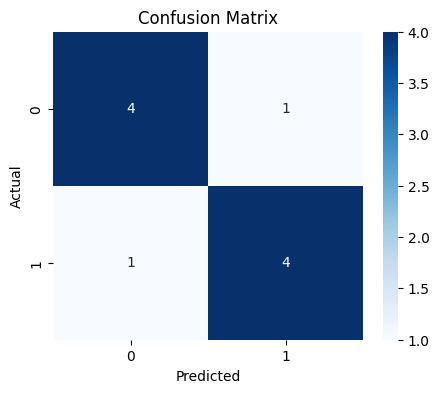

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize using heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 7️⃣ L2 Regularization (Ridge Regularization)


##  What is L2 Regularization?
- L2 regularization, also known as **Ridge Regularization**, is a technique used to **prevent overfitting** in machine learning models.
- It works by adding a **penalty term** to the loss function that is proportional to the **sum of the squared weights**.
- This encourages the model to **keep the weights small**, reducing model complexity and improving generalization.


##  Mathematical Formulation

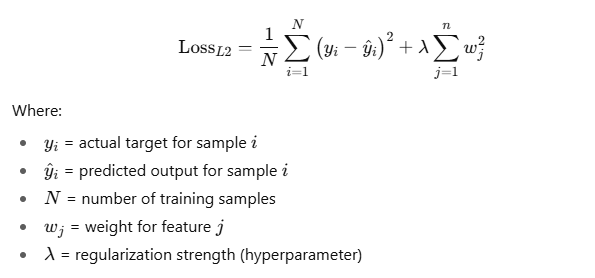

**Neural Network Weight Update with L2 regularization**

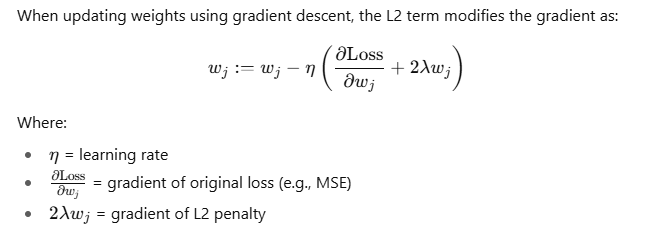


##  How It Works
- The **squared weights penalty** discourages large weight values.
- High values of lambda  → more regularization → weights shrink more → simpler model.  
- Low values of lambda → less regularization → model can fit the training data more closely.  


##  Why Use L2 Regularization
- Prevents **overfitting** by reducing model complexity.
- Encourages **smaller weights**, making the model more stable.
- Smooths predictions and improves **generalization** on unseen data.
- Works well when many features are relevant but with small contributions.


##  Key Points
- L2 regularization adds **squared weight penalty** to the loss function.
- Stronger regularization → smaller weights → less overfitting.
- Often used in **linear regression, logistic regression, and neural networks**.
- Contrast with **L1 regularization** which promotes sparsity (some weights exactly zero).

# 8️⃣ Dropout expectation:

Dropout is a **regularization technique** used to prevent overfitting in neural networks. It works by **randomly dropping neurons during training** and **scaling activations during inference**.


## 1️⃣ Dropout During Training

- For a layer with activations h = [h_1, h_2, ..., h_n]:
  1. Generate a **mask vector** r = [r_1, r_2, ..., r_n], where each r_i is a Bernoulli random variable:

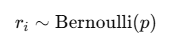

  - p = **keep probability** (probability of keeping a neuron).  

  2. Apply the mask to the activations:

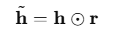

  - dot  = element-wise multiplication  
  - Neurons with r_i = 0 are **dropped** (set to zero).  



## 2️⃣ Dropout During Inference

- During inference, **all neurons are kept**, but activations are **scaled** by the keep probability \( p \) to maintain the expected output:

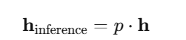

- This ensures:

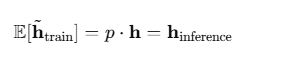


## ✅ Key Points

- Dropout **randomly zeroes neurons** during training to prevent co-adaptation.  
- During inference, **scaling ensures consistent expected activations**.  
- Helps the network **generalize better** and reduces **overfitting**.  
- Often used in **fully connected layers** in neural networks, especially for deep models.  

In [49]:
import numpy as np

# Simulate activations of a layer (e.g., 5 neurons)
activations = np.array([0.5, 1.0, -0.5, 0.8, 1.2])
keep_prob = 0.6  # Probability of keeping a neuron

# ----------------------------
# During Training
# ----------------------------
mask = np.random.binomial(1, keep_prob, size=activations.shape)
dropout_train = activations * mask
print("Original Activations: ", activations)
print("Mask: ", mask)
print("Activations after Dropout (Training): ", dropout_train)

# ----------------------------
# During Inference
# ----------------------------
dropout_inference = activations * keep_prob
print("Activations during Inference (Scaled): ", dropout_inference)

Original Activations:  [ 0.5  1.  -0.5  0.8  1.2]
Mask:  [1 0 1 1 1]
Activations after Dropout (Training):  [ 0.5  0.  -0.5  0.8  1.2]
Activations during Inference (Scaled):  [ 0.3   0.6  -0.3   0.48  0.72]


# 🔹 Dropout Code Explanation

1. **Layer Activations:**  
   - `activations` represents the outputs of a layer with 5 neurons.

2. **Keep Probability (`keep_prob`):**  
   - Probability of keeping a neuron active during training (here 0.6).

3. **Training Phase:**  
   - Generate a **mask** using Bernoulli distribution (`np.random.binomial`) to randomly drop neurons.  
   - Multiply activations by the mask to zero out some neurons.  
   - Result: Some activations are dropped, some are kept.

4. **Inference Phase:**  
   - No neurons are dropped; all activations are used.  
   - Scale activations by `keep_prob` to match the expected output during training.  

5. **Key Idea:**  
   - Dropout **prevents overfitting** by randomly dropping neurons during training.  
   - Scaling during inference ensures **consistent expected values**.


# 9️⃣ Batch Norm Equation (BN) in Deep Learning

Batch Normalization is used to **reduce the problem of internal covariate shift** in neural networks. It normalizes the data within each mini-batch, stabilizing the inputs to each layer and allowing faster and more stable training.

## 🔹 Why Batch Normalization is Needed

- Solves **internal covariate shift** by keeping layer inputs in a stable range.  
- Makes training **faster and more stable**.  
- Allows the use of **higher learning rates**.  
- Helps **avoid vanishing or exploding gradients**.  
- Can act as a **regularizer**, reducing the need for dropout.


### 1️⃣ Compute Mean and Variance of Mini-Batch

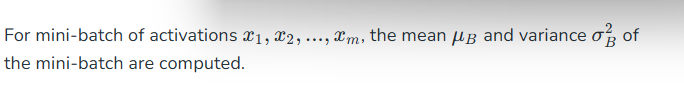

### 2️⃣ Normalize Activations

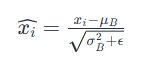

### 3️⃣ Scale and Shift

Introduce **learnable parameters** \( \gamma \) (scale) and \( \beta \) (shift):

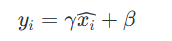

- Allows the model to **learn optimal scaling and shifting** of activations  


## ✅ Key Benefits

- **Faster Convergence**: Reduces internal covariate shift → speeds up training.  
- **Higher Learning Rates**: BN stabilizes activations → allows using higher learning rates.  
- **Regularization Effect**: Slight regularization → may reduce dropout requirement.  
- **Stabilizes Learning**: Makes training more effective → reduces careful initialization dependency.  

In [50]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Flatten, Input

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Build the model with Input layer
model = Sequential([
    Input(shape=(28, 28)),   # Use Input layer instead of passing input_shape to Flatten
    Flatten(),
    Dense(64),
    BatchNormalization(),     
    Activation('relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9135 - loss: 0.3064 - val_accuracy: 0.9536 - val_loss: 0.1573
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9533 - loss: 0.1571 - val_accuracy: 0.9672 - val_loss: 0.1147
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9645 - loss: 0.1197 - val_accuracy: 0.9697 - val_loss: 0.1027
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9693 - loss: 0.0991 - val_accuracy: 0.9701 - val_loss: 0.0942
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9733 - loss: 0.0869 - val_accuracy: 0.9704 - val_loss: 0.0955
